# augmentations

In [205]:
import albumentations as A
import nibabel as nib
import matplotlib.pyplot as plt
import cv2

In [206]:
img0 = nib.load('/home/euloo/Documents/datasets/acdc/patient008/patient008_frame01.nii.gz')
msk0 = nib.load('/home/euloo/Documents/datasets/acdc/patient008/patient008_frame01_gt.nii.gz')

img1 = nib.load('/home/euloo/Documents/datasets/acdc/patient008/patient008_frame13.nii.gz')
msk1 = nib.load('/home/euloo/Documents/datasets/acdc/patient008/patient008_frame13_gt.nii.gz')

In [207]:
img0 = img0.get_fdata()
msk0 = msk0.get_fdata()

img1 = img1.get_fdata()
msk1 = msk1.get_fdata()

In [208]:
img0 = img0[:,:,0]
msk0 = msk0[:,:,0]

img1 = img1[:,:,0]
msk1 = msk1[:,:,0]

In [209]:
def augment(aug, image, mask=None):
    augmented = aug(image=image, mask=mask)
    image_aug = augmented['image']
    mask_aug = augmented['mask']
    return image_aug, mask_aug

In [210]:
def show(image, image_aug, mask, mask_aug):
    f, ax = plt.subplots(2, 2, figsize=(16, 16))
  
    ax[0, 0].imshow(image, cmap = 'gray')
    ax[0, 0].set_title('Original image')

    ax[0, 1].imshow(image_aug, cmap = 'gray')
    ax[0, 1].set_title('Augmented image')

    ax[1, 0].imshow(mask, interpolation='nearest', cmap = 'gray')
    ax[1, 0].set_title('Original mask')

    ax[1, 1].imshow(mask_aug, interpolation='nearest', cmap = 'gray')
    ax[1, 1].set_title('Augmented mask')

    f.tight_layout()

In [211]:
img_mask_aug = A.Compose([
    A.PadIfNeeded(min_height=224,
                  min_width=224, 
                  border_mode=cv2.BORDER_CONSTANT, 
                  value=0,
                  p=1),
    
    A.CenterCrop(height=224,
                width=224,
                p=1),
    
    A.Blur(blur_limit=2, 
           p=0.5),
    
    A.Flip(p=0.5),
    
    A.RandomRotate90(p=0.5),
    
    A.ElasticTransform(p=0.5,
                       alpha=1,
                       sigma=10,
                       alpha_affine=10,
                      interpolation=cv2.INTER_LINEAR, 
                       border_mode=cv2.BORDER_CONSTANT, 
                       value=0),
    
    A.GridDistortion(p=0.5, 
                     interpolation=cv2.INTER_LINEAR, 
                     border_mode=cv2.BORDER_CONSTANT, 
                     value=0),
], p=1)

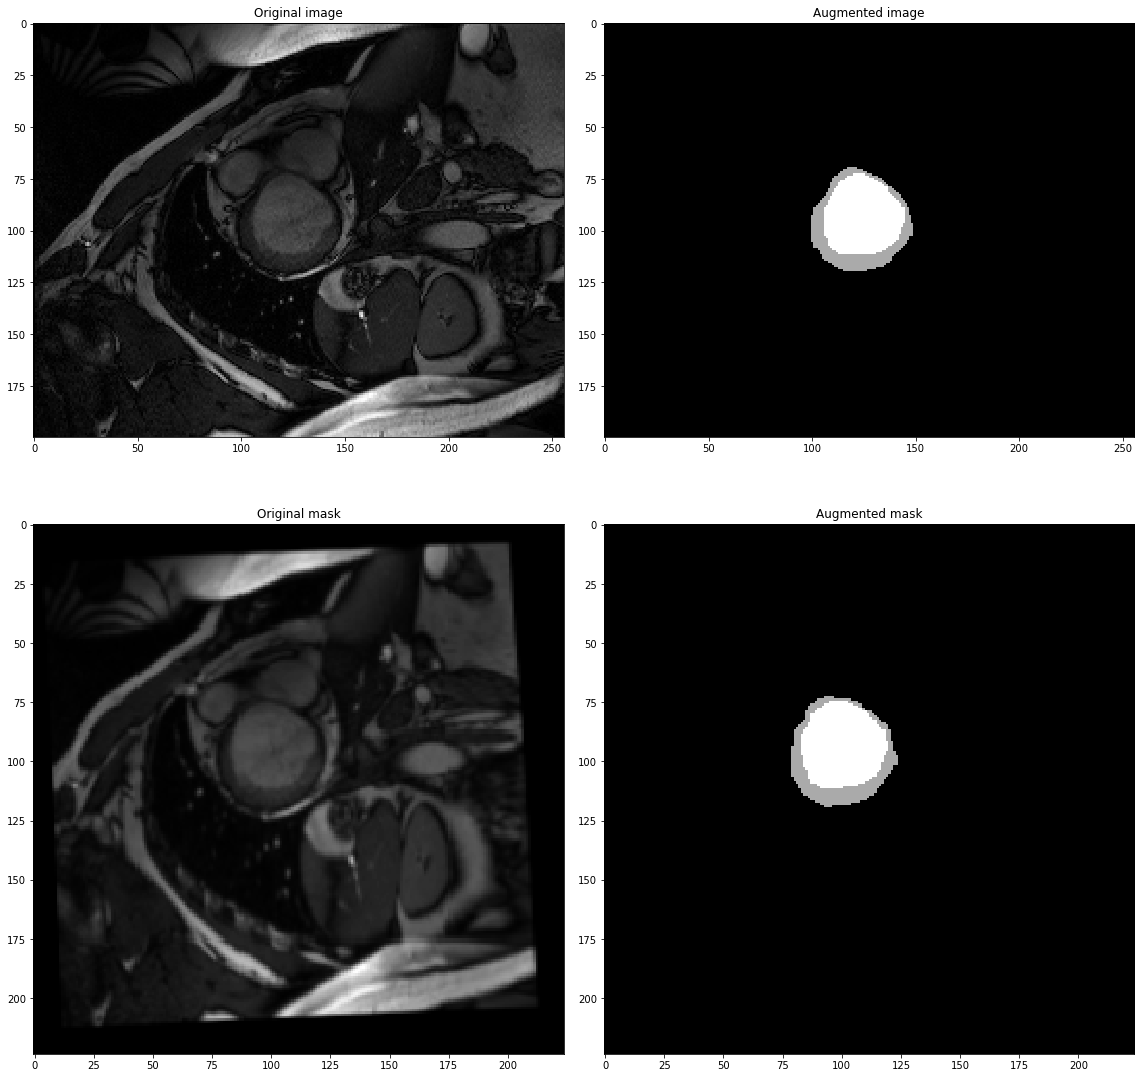

In [212]:
im, ma = augment(img_mask_aug, img1, msk1)
show(img1, msk1, im, ma)